In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [3]:
from util import RESOURCE_DIR, IMAGES_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
data_with_index = df.set_index("Projects")
data_with_index.reset_index(inplace=True)
data_with_index.head()


,Projects,Domains,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,FileMaker,Riak KV,Hive,Redis,...,Microsoft Azure SQL Database,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,CockroachDB,Etcd,MySQL
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            88
H2                               68
PostgreSQL                       61
CockroachDB                      57
Redis                            52
Oracle                           50
Ehcache                          41
MariaDB                          34
MongoDB                          30
MS SQL Server                    30
Microsoft Azure SQL Database     26
SQLite                           25
IBM DB2                          20
Google Cloud Datastore           14
Hazelcast                        14
DynamoDB                         13
HBase                            13
Cassandra                        13
SAP Adaptive Server              12
Hive                             11
Firebase Realtime                10
Informix                          9
Firebird                          8
Google BigQuery                   8
ClickHouse                        7
MS Access                         6
Amazon Redshift                   6
Snowflake                   

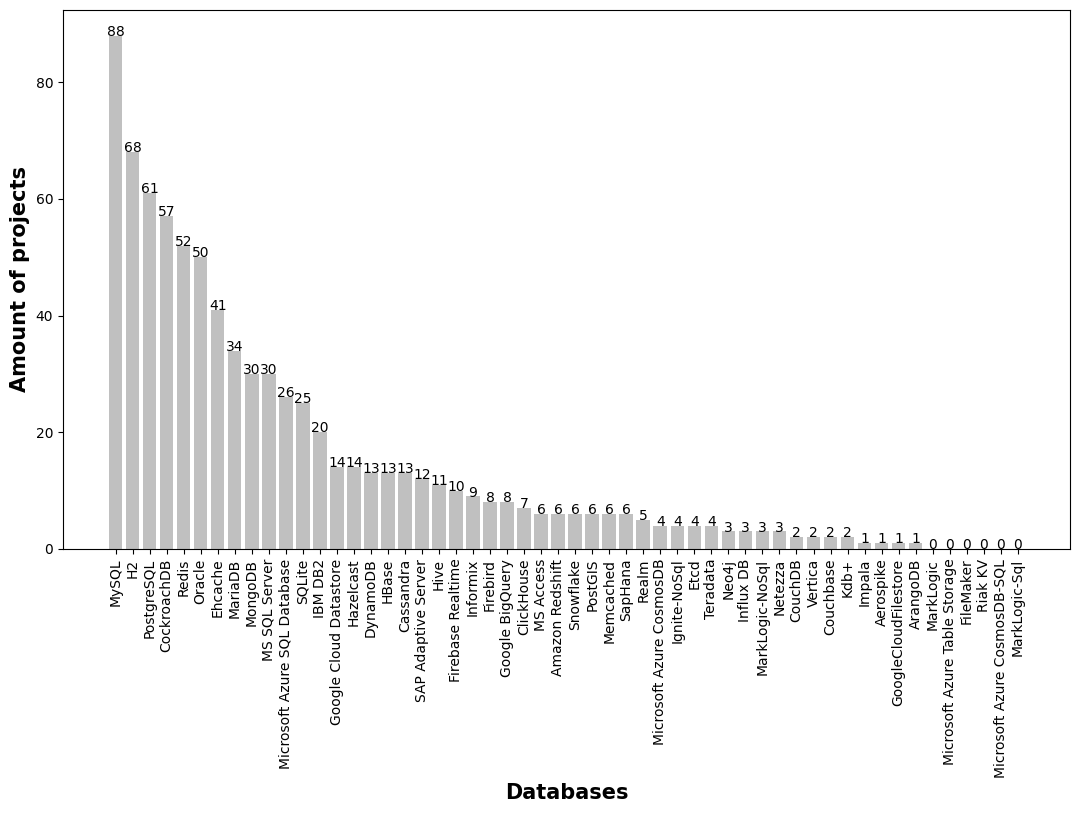

In [35]:
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

#plt.title("Distributions of Databases in Java Projects")
plt.show() 
#add os valores na coluna

In [36]:
# Ajustando o df para que eu possa fazer o gráfico de forma empilhada
db_types = data_with_index.iloc[:, data_with_index.columns != 'Domains']
db_types = db_types.set_index('Projects').transpose()
db_types.index.name = 'Databases'
relational_dbs = ['Oracle', 'MySQL_Maria DB', 'MS SQL Server_Microsoft Azure SQL Database', 'PostgreSQL_ CockroachDB',
                  'IBM_DB2', 'MS_Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 'FileMaker', 'SAP Adaptive Server',
                  'Informix', 'Firebird', 'Vertica', 'Impala', 'ClickHouse', 'H2', 'Ignite_Sql', 'Virtuoso_Sql']

map_dict = {name: "Relational" for name in relational_dbs}

db_types['Model'] = db_types.index.to_series().map(map_dict)
db_types['Model'] = db_types['Model'].fillna("Non Relational")
model = db_types.pop("Model")
db_types.insert(0, "Model", model)
db_types['Relational'] = db_types.apply(lambda row: row.iloc[1:].sum() if row['Model'] == 'Relational' else 0, axis=1)
db_types['Non Relational'] = db_types.apply(lambda row: row.iloc[1:].sum() if row['Model'] == 'Non Relational' else 0, axis=1)

db_types.loc[['MarkLogic'], 'Model'] = 'Multi Model' #'Virtuoso', 'Ignite', Retirei pois estava com erro.
#db_types.loc['Virtuoso', 'Relational'] = 0
#db_types.loc['Virtuoso', 'Non Relational'] = 2
#db_types.loc['Ignite', 'Relational'] = 2
db_types.loc['Ignite', 'Non Relational'] = 3
db_types.loc['MarkLogic', 'Relational'] = 0
db_types.loc['MarkLogic', 'Non Relational'] = 3

db_types.rename(columns={'Projects':  ''},)
db_types.to_excel("output.xlsx")


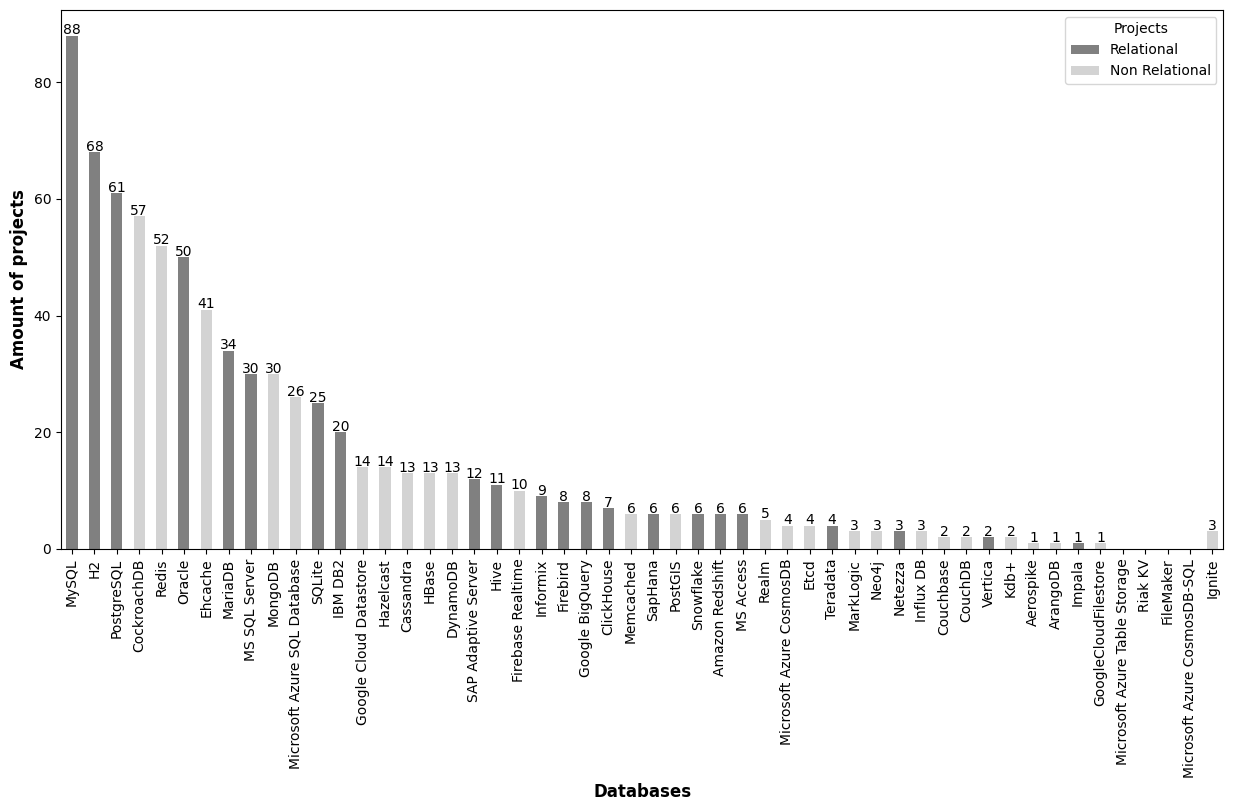

In [63]:
df_graph = db_types[['Model', 'Relational', 'Non Relational']].copy()
df_graph['Amount of Projects'] = db_types['Relational'] + db_types['Non Relational']
df_graph.drop(['Ignite-NoSql', 'MarkLogic-NoSql', 'MarkLogic-Sql'], inplace=True) #'Virtuoso-NoSql', 'Virtuoso-Sql', 'Ignite-Sql',

df_graph = df_graph.sort_values(by='Amount of Projects', ascending=False)

plt.rc('axes', prop_cycle = plt.cycler('color', ['gray', 'lightgray']))

ax = df_graph.plot(y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(15,7))

ax.set_xlabel("Databases", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight = 'bold')

for i in ax.patches:
    if i.get_height() != 0:
        ax.annotate(str(int(i.get_height())), (i.get_x() + i.get_width() / 2, i.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', 
                    xytext=(0, 1), textcoords='offset points')

plt.savefig(IMAGES_DIR+"/fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [43]:
relational_dbs = ['Oracle', 'MySQL_Maria DB', 'MS SQL Server_Microsoft Azure SQL Database', 'PostgreSQL_ CockroachDB',
                  'IBM_DB2', 'MS_Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 'FileMaker', 'SAP Adaptive Server',
                  'Informix', 'Firebird', 'Vertica', 'Impala', 'ClickHouse', 'H2', 'Ignite_Sql', 'Virtuoso_Sql']
relational_dbs

['MySQL',
 'H2',
 'PostgreSQL',
 'Oracle',
 'MariaDB',
 'MS SQL Server',
 'SQLite',
 'IBM DB2',
 'SAP Adaptive Server',
 'Hive',
 'Informix',
 'Firebird',
 'Google BigQuery',
 'ClickHouse',
 'Snowflake',
 'SapHana',
 'MS Access',
 'Amazon Redshift',
 'Teradata',
 'Netezza',
 'Vertica',
 'Impala',
 'MarkLogic-Sql',
 'FileMaker']

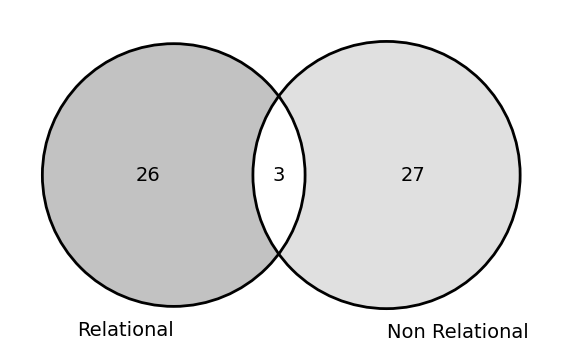

In [44]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
characterization_of_projects = pd.read_excel(RESOURCE_DIR + os.sep + 'output.xlsx', keep_default_na=False)

plt.figure(figsize=(7,7))
count_of_models = characterization_of_projects['Model'].value_counts()
A = count_of_models['Relational']
B = count_of_models['Non Relational']
AB = count_of_models['Multi Model']

venn = venn2(subsets = (A, B, AB), set_labels=('Relational', 'Non Relational'), set_colors=('darkgray', 'lightgray'), alpha= 0.7)
venn2_circles(subsets=(A, B, AB))

for text in venn.set_labels:  #change label size
 text.set_fontsize(14);
for text in venn.subset_labels:  #change number size
 text.set_fontsize(14)

 plt.savefig(IMAGES_DIR+"/fig10.pdf", format="pdf", bbox_inches="tight")

In [45]:
data_only_relational= data_with_index[relational_dbs].sum().sort_values(ascending=False)
data_only_relational

# Ver com a Camila, em relação a diferença de números entre o gráfico do paper e o meu

MySQL                  88
H2                     68
PostgreSQL             61
Oracle                 50
MariaDB                34
MS SQL Server          30
SQLite                 25
IBM DB2                20
SAP Adaptive Server    12
Hive                   11
Informix                9
Google BigQuery         8
Firebird                8
ClickHouse              7
Snowflake               6
SapHana                 6
MS Access               6
Amazon Redshift         6
Teradata                4
Netezza                 3
Vertica                 2
Impala                  1
MarkLogic-Sql           0
FileMaker               0
dtype: int64

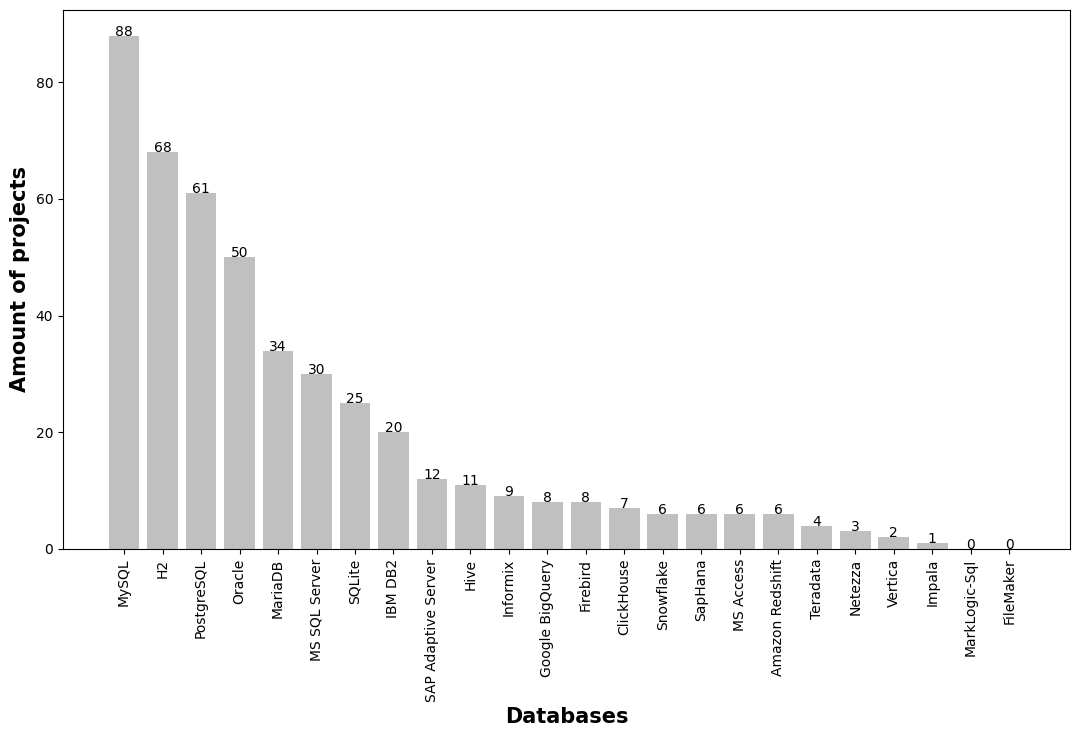

In [46]:
# Graph DBMS by Relational Model
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(data_only_relational.index, data_only_relational.values, color = 'silver')
addlabels(data_only_relational.index, data_only_relational.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

plt.show() 


In [55]:
data_only_non_relational = data_with_index.copy()
data_only_non_relational.drop(columns=relational_dbs, inplace=True)
data_only_non_relational

,Projects,Domains,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Riak KV,Redis,Aerospike,Google Cloud Datastore,...,Microsoft Azure CosmosDB-SQL,Realm,Cassandra,Ehcache,Microsoft Azure CosmosDB,Microsoft Azure SQL Database,CouchDB,PostGIS,CockroachDB,Etcd
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,yacy_search_server,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
313,YalpStore,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,SmartTubeNext,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,zaproxy,security,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#data_only_non_relational.drop(['MarkLogic', 'Ignite', 'Virtuoso'], inplace=True, axis=1)

In [56]:
data_only_non_relational = data_only_non_relational.iloc[: , 2:].sum().sort_values(ascending=False)
data_only_non_relational

CockroachDB                      57
Redis                            52
Ehcache                          41
MongoDB                          30
Microsoft Azure SQL Database     26
Google Cloud Datastore           14
Hazelcast                        14
Cassandra                        13
HBase                            13
DynamoDB                         13
Firebase Realtime                10
Memcached                         6
PostGIS                           6
Realm                             5
Microsoft Azure CosmosDB          4
Etcd                              4
Ignite-NoSql                      4
Influx DB                         3
Neo4j                             3
MarkLogic-NoSql                   3
Couchbase                         2
CouchDB                           2
Kdb+                              2
GoogleCloudFilestore              1
ArangoDB                          1
Aerospike                         1
Microsoft Azure Table Storage     0
Microsoft Azure CosmosDB-SQL

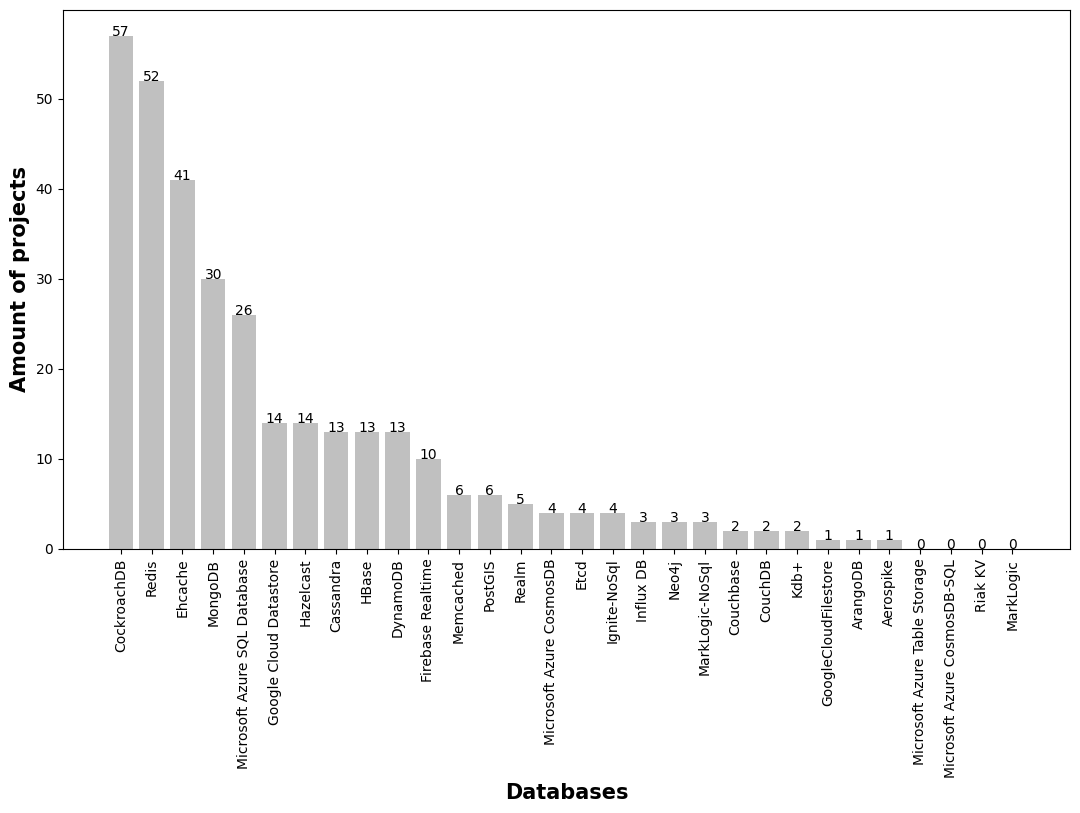

In [57]:
# Graph DBSM by Non Relational Model
plt.figure(figsize=(13,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(data_only_non_relational.index, data_only_non_relational.values, color = 'silver')
addlabels(data_only_non_relational.index, data_only_non_relational.values)
plt.xticks(rotation=90)
plt.xlabel("Databases", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)

plt.show() 

In [58]:
# Get frequency of values in the 'Domains' column
freq_domains = data_with_index['Domains'].value_counts()
freq_domains

software development         73
media                        43
infrastructure management    40
network                      18
game                         18
monitoring                   18
security                     16
hpc                          15
program analysis             15
communication                14
machine learning             12
file management               7
automation                    7
application container         6
collaboration                 3
scm                           2
cryptocurrency                2
operating system              2
gestão pessoal                2
erp                           2
e-commerce                    1
cms                           1
Name: Domains, dtype: int64

In [59]:
# Get the top 5 most frequent domains
most_popular_domains = freq_domains.head()
most_popular_domains = most_popular_domains.index
most_popular_domains

Index(['software development', 'media', 'infrastructure management', 'network',
       'game'],
      dtype='object')

In [60]:
data_group_by_domain =  data_with_index[data_with_index['Domains'].isin(most_popular_domains)]
data_group_by_domain

,Projects,Domains,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,FileMaker,Riak KV,Hive,Redis,...,Microsoft Azure SQL Database,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,CockroachDB,Etcd,MySQL
1,airbyte,infrastructure management,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Anki-Android,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,react-native-navigation,software development,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,yacy_search_server,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
313,YalpStore,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,SmartTubeNext,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


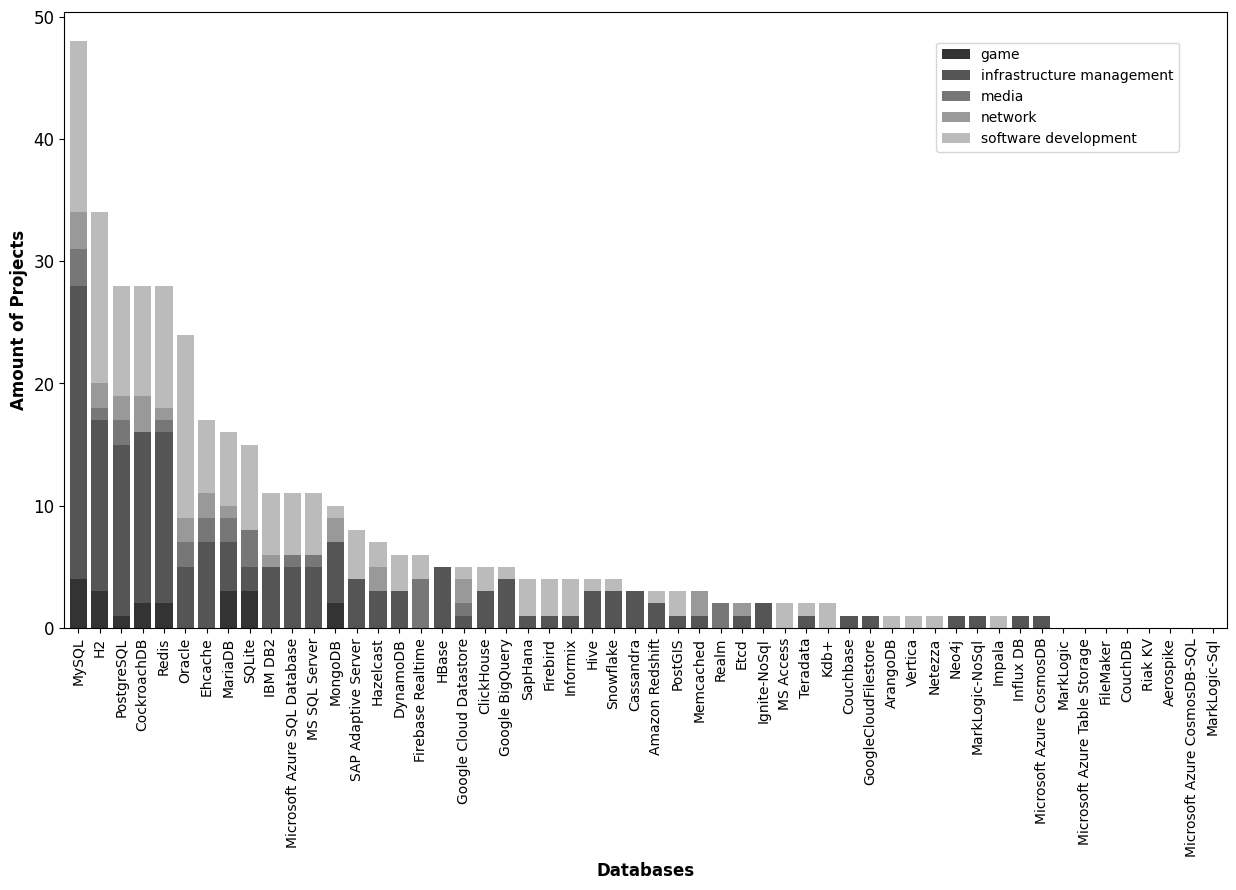

In [62]:
import matplotlib.pyplot as plt

grouped_data = data_group_by_domain.groupby('Domains').sum()

transposed_data = grouped_data.transpose()

# Sort the transposed data in descending order based on Amount of projects
transposed_data['Total'] = transposed_data.sum(axis=1)
transposed_data.sort_values(by='Total', inplace=True, ascending=False)
transposed_data.drop('Total', axis=1, inplace=True)

# Define grayscale colors
gray_colors = ['#333333', '#555555', '#777777', '#999999', '#BBBBBB']

# Create a stacked bar chart
ax = transposed_data.plot(kind='bar', stacked=True, figsize=(15, 8), color = gray_colors, width = 0.8)

# Set chart labels
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# Rotate x-axis labels and set their color and weight
plt.xticks(rotation=90)

# Set y-axis ticks and labels
plt.yticks(range(0, 60, 10), fontsize=12)


# Display the legend outside the plot
plt.legend(bbox_to_anchor=(0.75, 0.95), loc='upper left', borderaxespad=0.)
plt.savefig(IMAGES_DIR+"/fig4.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()



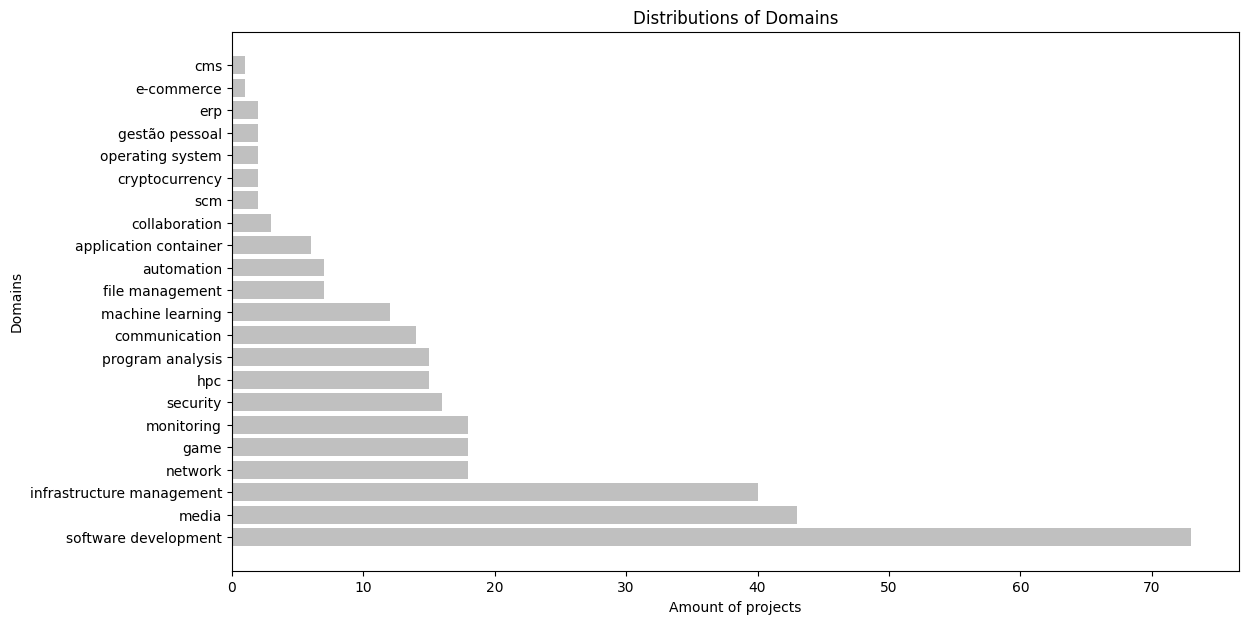

In [64]:
plt.figure(figsize=(13,7))

df = data_with_index.Domains.value_counts()
plt.barh(df.index, df.values, color='silver')
#plt.xticks(rotation=90)

plt.title("Distributions of Domains")
plt.xlabel("Amount of projects")
plt.ylabel("Domains")
plt.show() 

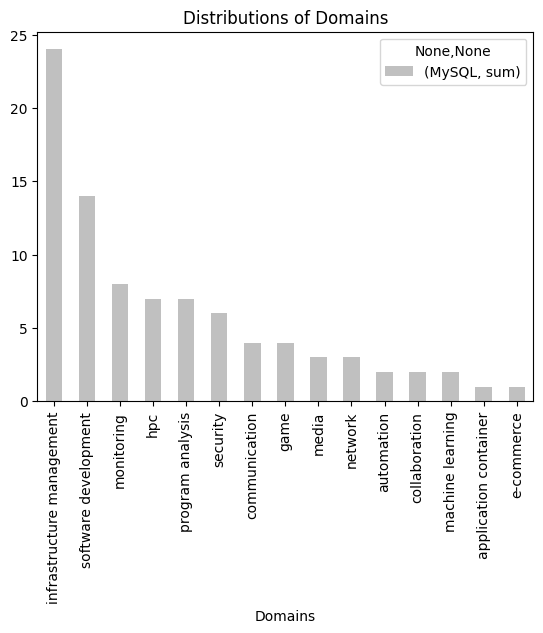

In [65]:
filtered_df = data_with_index.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

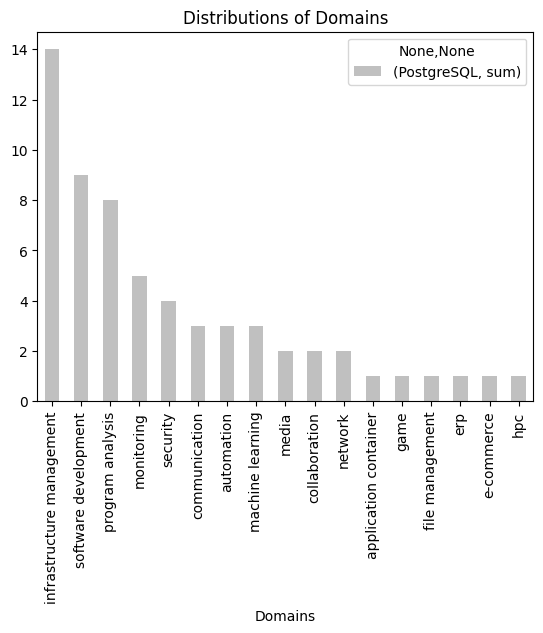

In [66]:

filtered_df = data_with_index.groupby('Domains').agg({'PostgreSQL':['sum']})
filtered_df = filtered_df[filtered_df['PostgreSQL']['sum'] > 0]
result = filtered_df.sort_values(by=('PostgreSQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

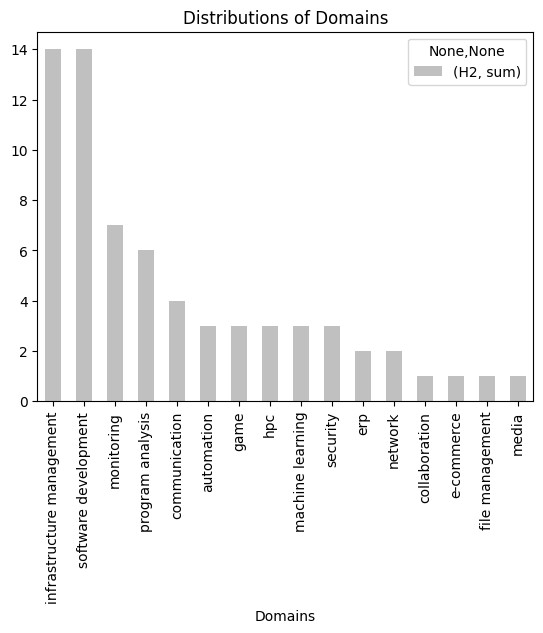

In [67]:

filtered_df = data_with_index.groupby('Domains').agg({'H2':['sum']})
filtered_df = filtered_df[filtered_df['H2']['sum'] > 0]
result = filtered_df.sort_values(by=('H2','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')


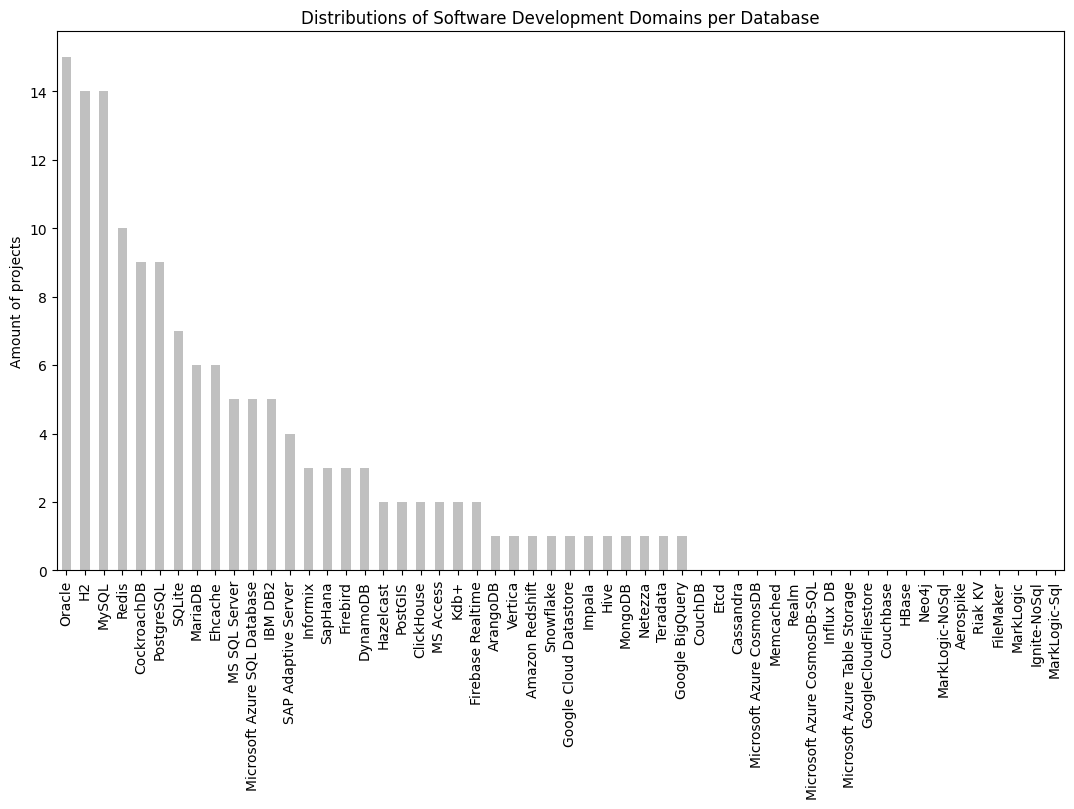

Text(0, 0.5, 'Amount of projects')

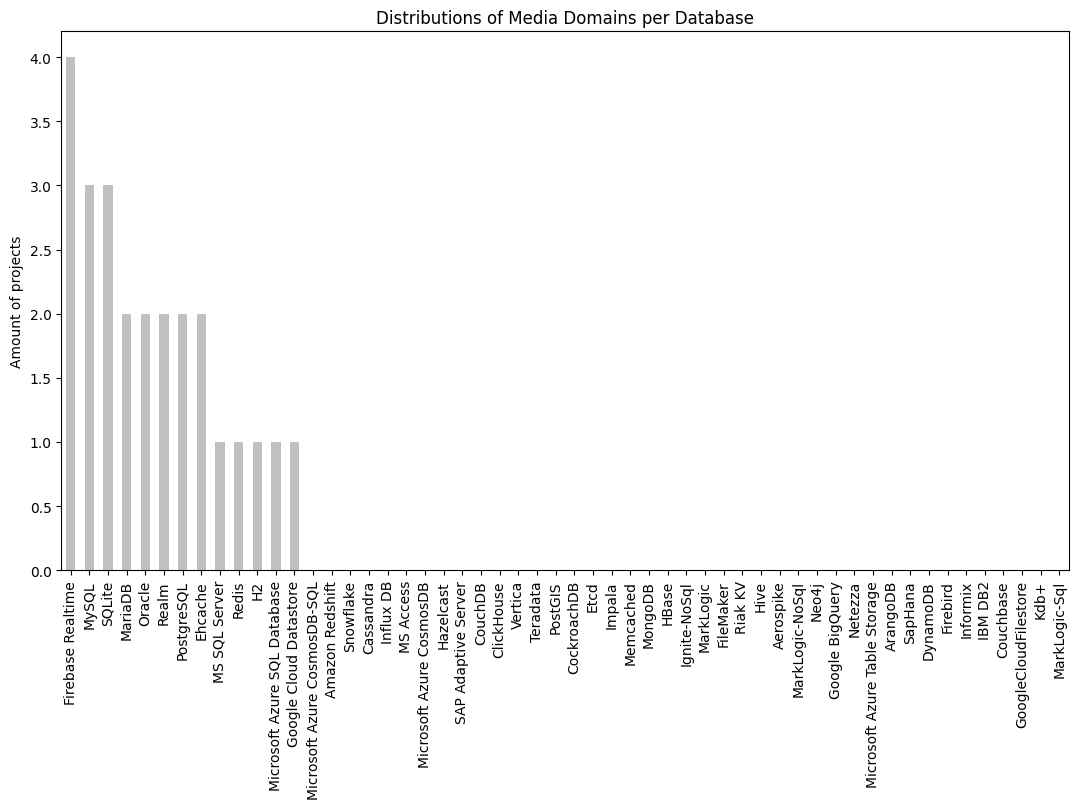

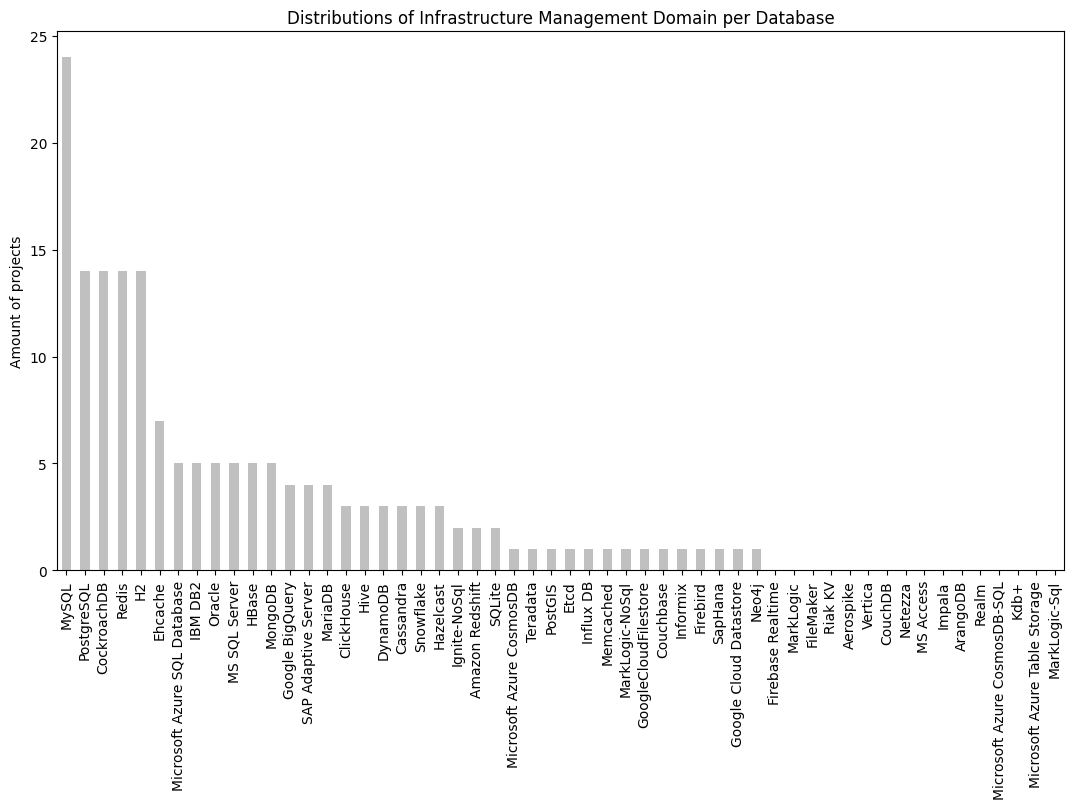

In [68]:


plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='software development'].sum()
df_software_development = df_software_development.iloc[2:].sort_values(ascending=False)
df_software_development.plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Software Development Domains per Database")
plt.ylabel("Amount of projects")
plt.show() 

plt.figure(figsize=(13,7))
media = data_with_index[data_with_index.Domains =='media'].sum()
#print(df_software_development.iloc[2:].sort_values(ascending=False))
media.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver', title = 'Distributions of Domains')
plt.title("Distributions of Media Domains per Database")
plt.ylabel("Amount of projects")
#plt.show() 

plt.figure(figsize=(13,7))
infrastructure_management = data_with_index[data_with_index.Domains =='infrastructure management'].sum()
infrastructure_management.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Infrastructure Management Domain per Database")
plt.ylabel("Amount of projects")
#plt.show()



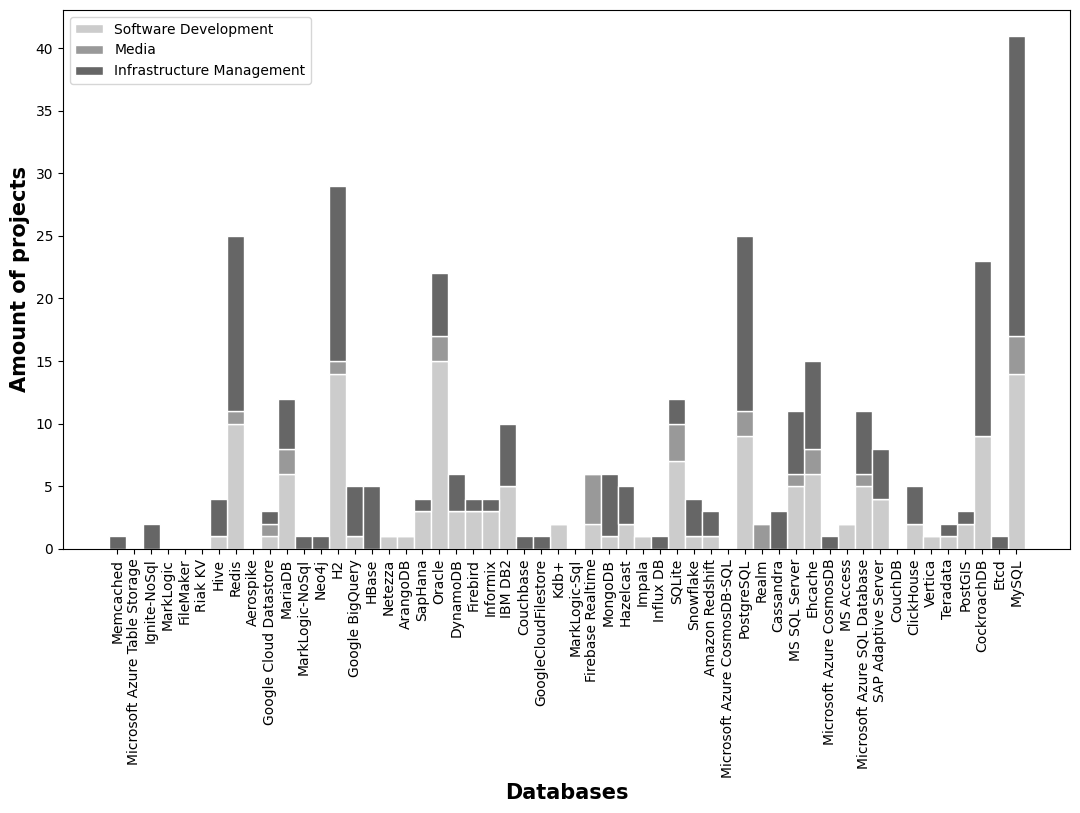

In [69]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth =1.0
fig = plt.subplots(figsize =(13, 7))

names_list = data_with_index.columns.to_list()
names_list.remove('Projects')
names_list.remove('Domains')

domains = data_with_index.groupby('Domains')

software_development = domains.get_group('software development')
software_development_sum = software_development.agg([np.sum])
software_development_results = software_development_sum.iloc[: , 2:].values.tolist()

media = domains.get_group('media')
media_sum = media.agg([np.sum])
media_results = media_sum.iloc[: , 2:].values.tolist()

infrastructure_management = domains.get_group('infrastructure management')
infrastructure_management_sum = infrastructure_management.agg([np.sum])
infrastructure_management_result = infrastructure_management_sum.iloc[: , 2:].values.tolist()

br1 = np.arange(len(software_development_results[0]))
plt.bar(br1, software_development_results[0], color='#CCCCCC', edgecolor='white', width = barWidth, label ='Software Development')
plt.bar(br1, media_results[0], bottom=software_development_results[0], color='#999999', edgecolor='white', width = barWidth, label ='Media')
plt.bar(br1, infrastructure_management_result[0], bottom=[i+j for i,j in zip(software_development_results[0], media_results[0])], color='#666666', edgecolor='white', width = barWidth, label ='Infrastructure Management')
plt.xlabel('Databases', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of projects', fontweight ='bold', fontsize = 15)
plt.xticks(br1, names_list, rotation=90)

plt.legend()
plt.show()

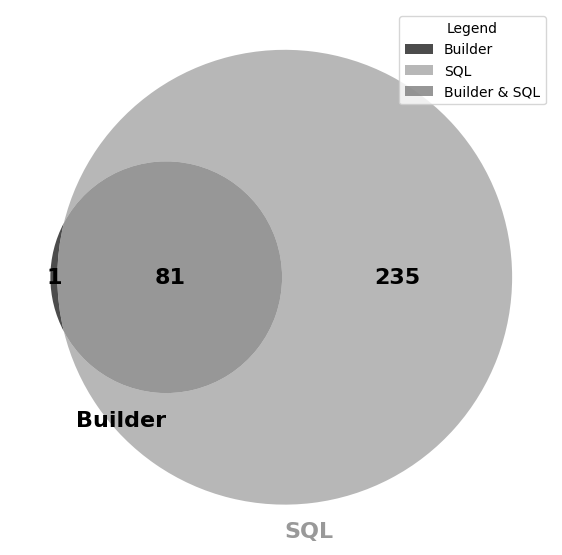

In [72]:
from collections import Counter
from util import RESOURCE_DIR
from matplotlib_venn import venn2

type_characterization = ['query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)

AB_overlap = 0
A_rest = 0
B_rest = 0

for i in range(len(df)):
    if (df.at[i,'Builder'] == df.at[i, 'SQL']):
        AB_overlap += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'SQL'] == 1):
        B_rest += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'Builder'] == 1):
        A_rest += 1

sets = Counter()
sets['10'] = A_rest
sets['01'] = B_rest
sets['11'] = AB_overlap

labels = ('Builder', 'SQL')
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['#000000','#999999']
v = venn2(subsets=sets, set_labels=labels, ax=ax,set_colors= colors, alpha=0.7)

i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(16)
  text.set_fontweight('bold')
  i+=1
  
for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')
  
h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['Builder','SQL','Builder & SQL']
ax.legend(handles=h, labels=l, title="Legend",loc='upper right')  

plt.savefig(IMAGES_DIR+"/fig8.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
#calcula a quantidade de bancos utilizados e a quantidade de projetos que encontramos bancos
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df['BDsPerProjects'] = df.sum(axis=1, numeric_only=True)
#df = df.iloc[2:].sort_values(ascending=False)
#df.count(by='BDsPerProjects')
df

,Projects,Domains,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,FileMaker,Riak KV,Hive,Redis,...,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,CockroachDB,Etcd,MySQL,BDsPerProjects
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,airbyte,infrastructure management,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,12
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,yacy_search_server,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,4
313,YalpStore,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,SmartTubeNext,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,zaproxy,security,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
